In [95]:
%reload_ext autoreload
%autoreload 2

from data import get_err_dicts
from plotter import plot_error_rates


DEVICE = 'ibm_sherbrooke'
STATE = 'X0'


round_err_dict = {}
for ROUNDS in [10, 20, 30, 40, 50, 75, 100]:
    file_name = f'../../results/{DEVICE}_{STATE}_{ROUNDS}.json'
    try:
        _, err_per_method = get_err_dicts(file_name)
        round_err_dict[ROUNDS] = err_per_method
    except:
        continue

print(round_err_dict)
distances = [51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3]


Number of jobs: 16

Number of jobs: 20

Number of jobs: 20

Number of jobs: 20

Number of jobs: 20

Number of jobs: 20

{10: {'s_K': {'d': [51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3], 'errs': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 64.0, 204.0, 646.0, 2102.0, 6400.0, 21325.0, 71434.0, 245312.0], 'tot_shots': [208800, 261000, 391500, 522000, 652500, 783000, 913500, 1044000, 1174500, 1305000, 1435500, 1566000, 1696500, 1827000, 1957500, 2088000, 2218500, 2349000, 2479500, 2610000, 2740500, 2871000, 3001500, 3132000, 3262500]}, 'h_K': {'d': [51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3], 'errs': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 29.0, 99.0, 281.0, 893.0, 2737.0, 7903.0, 24215.0, 76343.0, 253260.0], 'tot_shots': [208800, 261000, 391500, 522000, 652500, 783000, 913500, 1044000, 1174500, 1305000, 14

In [96]:
rounds_ = list(round_err_dict.keys())
print(rounds_)

p_per_round = {}
for method in round_err_dict[rounds_[0]]:
    if method not in p_per_round:
        p_per_round[method] = {}
    for d_idx, d in enumerate(distances):
        p_per_round[method][d] = []
        for T in rounds_:
            err = round_err_dict[T][method]['errs'][d_idx]
            shots = round_err_dict[T][method]['tot_shots'][d_idx]
            p = err / shots
            p_per_round[method][d].append(p)

print(p_per_round)


[10, 20, 30, 40, 50, 75]
{'s_K': {51: [0.0, 0.0, 0.0, 0.0, 1.7386164090616687e-05, 0.0002701375245579568], 49: [0.0, 0.0, 0.0, 0.0, 8.693082045308344e-06, 0.0002455795677799607], 47: [0.0, 0.0, 0.0, 0.0, 1.1590776060411125e-05, 0.0002865094957432875], 45: [0.0, 0.0, 0.0, 0.0, 8.693082045308344e-06, 0.0002824165029469548], 43: [0.0, 0.0, 0.0, 2.6795284030010716e-06, 6.954465636246675e-06, 0.0002799607072691552], 41: [0.0, 0.0, 0.0, 0.0, 2.3181484947972055e-05, 0.00034790438768827765], 39: [0.0, 0.0, 0.0, 0.0, 2.2353584024638618e-05, 0.000561324726354196], 37: [0.0, 0.0, 0.0, 0.0, 3.259898682348952e-05, 0.0008042730844793713], 35: [0.0, 0.0, 0.0, 0.0, 5.9885560625437065e-05, 0.0011733246016153679], 33: [0.0, 0.0, 2.041649652919559e-06, 0.0, 6.780592206491634e-05, 0.0016822200392927309], 31: [0.0, 0.0, 4.640112847544452e-06, 4.871869823638312e-06, 9.00917988013049e-05, 0.002274959814252545], 29: [0.0, 0.0, 8.506873553831496e-06, 6.698821007502679e-06, 0.00011011205350286726, 0.00310044204

In [97]:
# import matplotlib.pyplot as plt


# for d in distances:
#     if d > 21:
#         continue
#     plt.plot(rounds_, p_per_round[d], label=f'd = {d}', marker='o')

# plt.xlabel('Rounds')
# plt.ylabel('Error rate')
# plt.yscale('log')
# # plt.legend()


ps: [0.00000000e+00 2.00585710e-06 7.29160590e-05 1.11966008e-04
 5.04197506e-04 5.75884086e-03]
rounds: [10 20 30 40 50 75]
[ 0.00000000e+00 -4.01172225e-06 -1.45842753e-04 -2.23957093e-04
 -1.00890378e-03 -1.15845240e-02]
[1.         0.99999599 0.99985417 0.99977607 0.9989916  0.98848232]


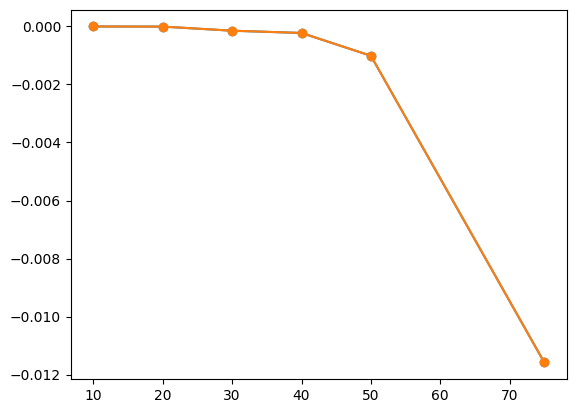

In [98]:
import numpy as np 
import matplotlib.pyplot as plt

distance = 25
method = 's_K'
ps = np.array(p_per_round['s_K'][distance])
rounds = np.array(rounds_)
print(f"ps: {ps}")
print(f"rounds: {rounds}")

print(np.log(1-2*ps))
print(1-2*ps)
plt.plot(rounds, np.log(1-2*ps), marker='o')
plt.plot(rounds, np.log(1-2*ps), marker='o')

e_L: 4.068494994846628e-06


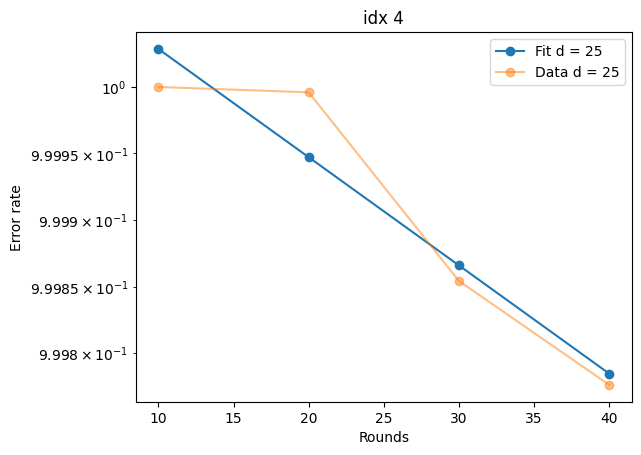

In [103]:
import numpy as np
import matplotlib.pyplot as plt


def model_func(rounds, e_L):
    return np.log((1 - (1 - 2 * e_L) ** rounds)/2)

rounds_ = np.array(rounds_)
params = {}
idx = 4
for d in p_per_round[method].keys():
    if d != distance:
        continue
    

    y_data = np.log(1-2*np.array(p_per_round[method][d]))[:idx]
    x_data = rounds_[:idx]
    slope, intercept = np.polyfit(x_data, y_data, 1)
    e_L = (1-np.exp(slope)) / 2
    print(f"e_L: {e_L}")
    params[d] = e_L

    # Plot
    plt.plot(x_data, np.exp(intercept + slope * x_data), label=f'Fit d = {d}', marker='o')
    plt.plot(x_data, 1 - 2*np.array(p_per_round[method][d][:idx]), label=f'Data d = {d}', alpha=0.5, marker='o')

    # plt.plot(x_data, (1-(1-2*e_L))**x_data/2, label=f'd = {d}', marker='o')
    # plt.scatter(x_data, p_per_round[d], label=f'd = {d}', marker='o')


plt.xlabel('Rounds')
plt.ylabel('Error rate')
plt.yscale('log')
plt.legend()
plt.title(f"idx {idx}")
plt.show()

In [108]:
rounds_ = np.array(list(round_err_dict.keys()))

idx = 6
plot = False

e_L_per_method = {}
for method in p_per_round.keys():
    if method not in e_L_per_method:
        e_L_per_method[method] = {}
    for distance in p_per_round[method].keys():
        y_data = np.log(1-2*np.array(p_per_round[method][distance]))[:idx]
        x_data = rounds_[:idx]
        slope, intercept = np.polyfit(x_data, y_data, 1)
        e_L = (1-np.exp(slope)) / 2
        e_L_per_method[method][distance] = e_L

        if plot:
            plt.figure()
            plt.plot(x_data, np.exp(intercept + slope * x_data), label=f'Fit d = {distance}, e_L = {e_L:.1e}', marker='o')
            plt.plot(x_data, 1 - 2*np.array(p_per_round[method][distance][:idx]), label=f'Data d = {distance}', alpha=0.5, marker='o')
            plt.xlabel('Rounds')
            plt.ylabel('Error rate')
            plt.legend()
            plt.title(f"method = {method}")
            plt.show()

print(e_L_per_method)
e_L_per_method

{'s_K': {51: 3.851231873908123e-06, 49: 3.467954709013288e-06, 47: 4.052847550284344e-06, 45: 3.9822261596600406e-06, 43: 3.942346154250931e-06, 41: 4.96396822546874e-06, 39: 7.94074730287031e-06, 37: 1.1382949273441856e-05, 35: 1.6669487222065182e-05, 33: 2.3821545671709465e-05, 31: 3.222567420829714e-05, 29: 4.388944062755362e-05, 27: 5.9764162795017395e-05, 25: 8.304925330965274e-05, 23: 0.00011148050819426158, 21: 0.000163228393066428, 19: 0.0002385512206981577, 17: 0.0003479498235181011, 15: 0.0005221052934969994, 13: 0.0007836682111526105, 11: 0.0012607075268556978, 9: 0.0020250806670365495, 7: 0.003231510282313166, 5: 0.005365264349168453, 3: 0.009414137531865818}, 'h_K': {51: 2.752712661918677e-05, 49: 2.9600976743704432e-05, 47: 3.743535814954013e-05, 45: 4.1335181249047004e-05, 43: 4.997406635853796e-05, 41: 6.373554288174876e-05, 39: 8.40625774077286e-05, 37: 0.0001041921472548224, 35: 0.00013229729941005575, 33: 0.00016778980646442454, 31: 0.00020367076007726803, 29: 0.0002

{'s_K': {51: 3.851231873908123e-06,
  49: 3.467954709013288e-06,
  47: 4.052847550284344e-06,
  45: 3.9822261596600406e-06,
  43: 3.942346154250931e-06,
  41: 4.96396822546874e-06,
  39: 7.94074730287031e-06,
  37: 1.1382949273441856e-05,
  35: 1.6669487222065182e-05,
  33: 2.3821545671709465e-05,
  31: 3.222567420829714e-05,
  29: 4.388944062755362e-05,
  27: 5.9764162795017395e-05,
  25: 8.304925330965274e-05,
  23: 0.00011148050819426158,
  21: 0.000163228393066428,
  19: 0.0002385512206981577,
  17: 0.0003479498235181011,
  15: 0.0005221052934969994,
  13: 0.0007836682111526105,
  11: 0.0012607075268556978,
  9: 0.0020250806670365495,
  7: 0.003231510282313166,
  5: 0.005365264349168453,
  3: 0.009414137531865818},
 'h_K': {51: 2.752712661918677e-05,
  49: 2.9600976743704432e-05,
  47: 3.743535814954013e-05,
  45: 4.1335181249047004e-05,
  43: 4.997406635853796e-05,
  41: 6.373554288174876e-05,
  39: 8.40625774077286e-05,
  37: 0.0001041921472548224,
  35: 0.00013229729941005575,
 

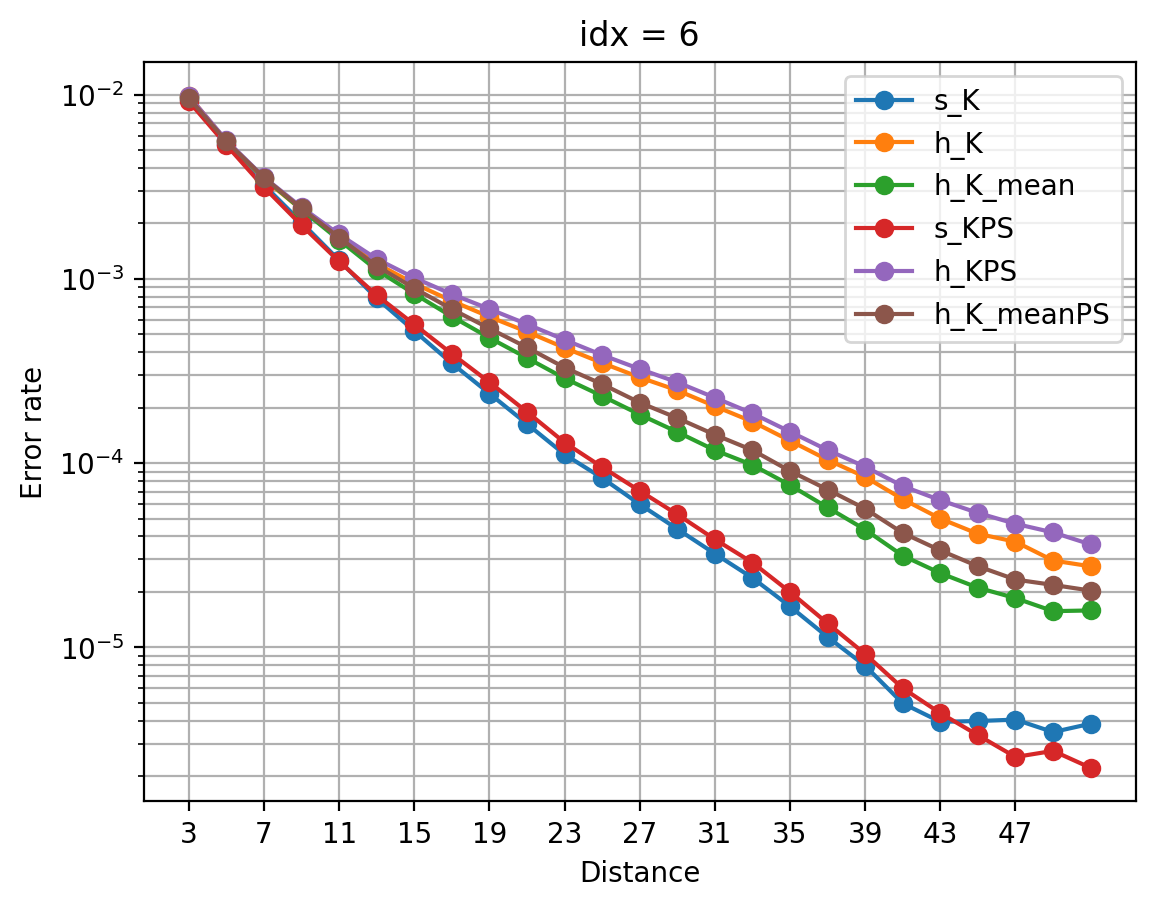

In [109]:
plt.figure(dpi=200)

for method in e_L_per_method.keys():
    # if method != 's_K':
    #     continue
    plt.plot(list(e_L_per_method[method].keys()), list(e_L_per_method[method].values()), label=f'{method}', marker='o')
plt.xlabel('Distance')
plt.ylabel('Error rate')
plt.yscale('log')
plt.xticks(range(3, 51, 4))
plt.legend()
plt.title(f"idx = {idx}")
plt.grid(which='both')

In [111]:
from scipy.optimize import curve_fit


def model_func(rounds, e_L):
    return 1 - (1 - 2 * e_L) ** rounds


rounds_ = np.array(list(round_err_dict.keys()))

idx = 6
plot = False

e_L_per_method = {}
for method in p_per_round.keys():
    if method not in e_L_per_method:
        e_L_per_method[method] = {}
    for distance in p_per_round[method].keys():
        y_data = np.array(p_per_round[method][distance])[:idx]
        x_data = rounds_[:idx]
        popt, pcov = curve_fit(model_func, x_data, y_data)
        print(popt)

        # if plot:
        #     plt.figure()
        #     plt.plot(x_data, np.exp(intercept + slope * x_data), label=f'Fit d = {distance}, e_L = {e_L:.1e}', marker='o')
        #     plt.plot(x_data, 1 - 2*np.array(p_per_round[method][distance][:idx]), label=f'Data d = {distance}', alpha=0.5, marker='o')
        #     plt.xlabel('Rounds')
        #     plt.ylabel('Error rate')
        #     plt.legend()
        #     plt.title(f"method = {method}")
        #     plt.show()

# print(e_L_per_method)
# e_L_per_methodø

[0.99284806]
[0.992848]
[0.99284813]
[0.99284813]
[0.99284812]
[0.9928483]
[0.99284903]
[0.99284983]
[0.992851]
[0.99285271]
[0.99285464]
[0.99285738]
[0.99286067]
[0.99286468]
[0.99286839]
[0.9928738]
[0.99287421]
[0.99286798]
[0.9928541]
[0.99282713]
[0.99280543]
[0.99274943]
[0.99257617]
[0.99214562]
[0.9909942]
[0.99285353]
[0.99285354]
[0.99285513]
[0.9928558]
[0.9928576]
[0.99286074]
[0.99286549]
[0.99286953]
[0.99287529]
[0.99288299]
[0.99289057]
[0.99289972]
[0.99290777]
[0.992917]
[0.99292442]
[0.99292465]
[0.99290851]
[0.99287904]
[0.99283797]
[0.99279242]
[0.99275486]
[0.99268719]
[0.99250617]
[0.99206813]
[0.9909026]
[0.99285099]
[0.99285076]
[0.9928513]
[0.99285173]
[0.9928527]
[0.9928541]
[0.99285702]
[0.99286031]
[0.99286458]
[0.9928695]
[0.99287366]
[0.99288016]
[0.99288714]
[0.99289533]
[0.99290243]
[0.99290748]
[0.99290111]
[0.99288195]
[0.99284973]
[0.99280386]
[0.99276597]
[0.99268371]
[0.99248283]
[0.99204497]
[0.99092827]
[0.99284758]
[0.99284786]
[0.99284779]
[0.